In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for Box-Cox Transformation
from scipy import stats


# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# read in all our data
dfKickstarters = pd.read_csv("ks-projects-201801.csv")

# set seed for reproducibility
np.random.seed(101)

import plotly.offline as py
py.init_notebook_mode(connected=True)


import plotly.graph_objs as go
import plotly.figure_factory as ff

from datetime import datetime

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dfKickstarters.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
dfKickstarters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [4]:
dfKickstarters.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
dfKickstarters.nunique()

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64

In [6]:
dfKickstarters['state'].unique()

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [7]:
dfDescribe=pd.DataFrame(columns='dataFeatures dataType null nullPct unique uniqueSample'.split(),
                        data=[[col, dfKickstarters.dtypes[col], sum(dfKickstarters[col].isna()),round(100*sum(dfKickstarters[col].isna())/len(dfKickstarters[col]),2),dfKickstarters[col].nunique(),list(dfKickstarters[col].unique()[:])]for col in dfKickstarters.columns])
                                                                  
dfDescribe

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.0,378661,"[1000002330, 1000003930, 1000004038, 100000754..."
1,name,object,4,0.0,375764,"[The Songs of Adelaide & Abullah, Greeting Fro..."
2,category,object,0,0.0,159,"[Poetry, Narrative Film, Music, Film & Video, ..."
3,main_category,object,0,0.0,15,"[Publishing, Film & Video, Music, Food, Design..."
4,currency,object,0,0.0,14,"[GBP, USD, CAD, AUD, NOK, EUR, MXN, SEK, NZD, ..."
5,deadline,object,0,0.0,3164,"[2015-10-09, 2017-11-01, 2013-02-26, 2012-04-1..."
6,goal,float64,0,0.0,8353,"[1000.0, 30000.0, 45000.0, 5000.0, 19500.0, 50..."
7,launched,object,0,0.0,378089,"[2015-08-11 12:12:28, 2017-09-02 04:43:57, 201..."
8,pledged,float64,0,0.0,62130,"[0.0, 2421.0, 220.0, 1.0, 1283.0, 52375.0, 120..."
9,state,object,0,0.0,6,"[failed, canceled, successful, live, undefined..."


In [8]:
len(dfKickstarters[dfKickstarters['state'] == 'successful'])

133956

In [9]:
dfKickstarters[(dfKickstarters['state'] == 'successful') & (dfKickstarters['country'] == 'US') ]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.0
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.0
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.0
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.0
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:11,34268.00,successful,624,US,34268.00,34268.00,20000.0
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,701.66,successful,66,US,701.66,701.66,175.0
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,15827.00,successful,147,US,15827.00,15827.00,10000.0
29,100011318,My Moon - Animated Short Film,Animation,Film & Video,USD,2017-05-03,50000.0,2017-04-03 17:11:33,57577.31,successful,840,US,10120.00,57577.31,50000.0
31,1000117861,Ledr workbook: one tough journal!,Product Design,Design,USD,2016-10-08,1000.0,2016-09-07 13:14:26,47266.00,successful,549,US,11253.00,47266.00,1000.0
34,100012079,Chris Eger Band - New Nashville Record!,Music,Music,USD,2014-08-13,12000.0,2014-07-14 22:35:51,13260.00,successful,92,US,13260.00,13260.00,12000.0


In [10]:
len(dfKickstarters[(dfKickstarters['state'] == 'successful') & (dfKickstarters['country'] == 'US') ])

109299

In [11]:
dfKickstarters[(dfKickstarters['state'] == 'successful') | (dfKickstarters['state'] == 'failed')]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
10,100004721,Of Jesus and Madmen,Nonfiction,Publishing,CAD,2013-10-09,2500.0,2013-09-09 18:19:37,0.00,failed,0,CA,0.00,0.00,2406.39
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
12,1000055792,The Cottage Market,Crafts,Crafts,USD,2014-10-02,5000.0,2014-09-02 17:11:50,0.00,failed,0,US,0.00,0.00,5000.00


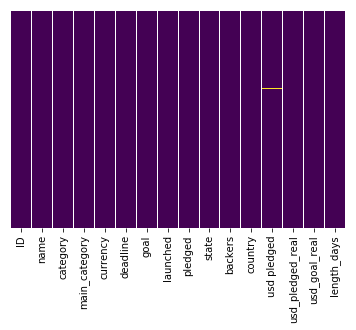

In [19]:
sns.heatmap(dfKickstarters.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
dfClean = dfKickstarters.dropna().info()
dfClean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 16 columns):
ID                  374860 non-null int64
name                374860 non-null object
category            374860 non-null object
main_category       374860 non-null object
currency            374860 non-null object
deadline            374860 non-null object
goal                374860 non-null float64
launched            374860 non-null object
pledged             374860 non-null float64
state               374860 non-null object
backers             374860 non-null int64
country             374860 non-null object
usd pledged         374860 non-null float64
usd_pledged_real    374860 non-null float64
usd_goal_real       374860 non-null float64
length_days         374860 non-null int64
dtypes: float64(5), int64(3), object(8)
memory usage: 48.6+ MB


In [43]:
sns.pairplot(dfClean, hue='state' )

TypeError: 'data' must be pandas DataFrame object, not: <class 'NoneType'>